### Import

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gc

In [6]:
TRAIN_DIR = "/kaggle/input/ucsd-anomaly-dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train"
IMG_SIZE = 256

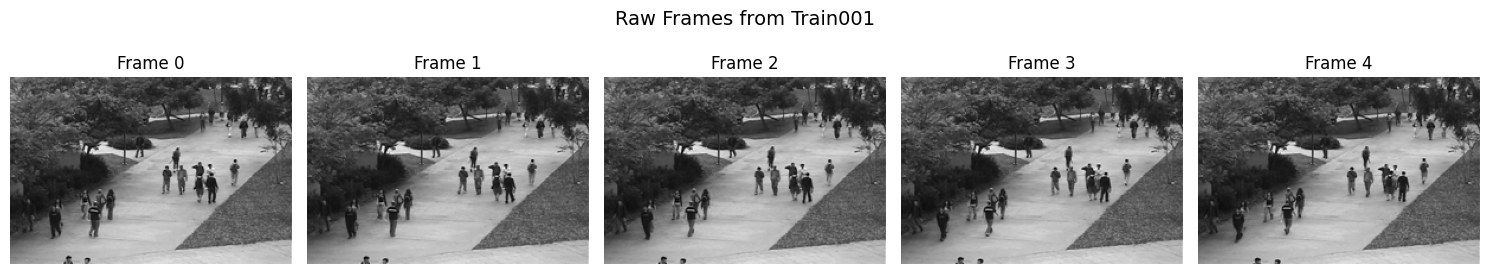

In [3]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

def visualize_frames(folder_dir,folder_name, num_frames=5):
    folder_path = os.path.join(folder_dir, folder_name)
    tif_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif')])

    plt.figure(figsize=(15, 3))
    for i in range(num_frames):
        image_path = os.path.join(folder_path, tif_files[i])
        img = cv.imread(image_path, 0)
        
        plt.subplot(1, num_frames, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Frame {i}")
        plt.axis('off')

    plt.suptitle(f"Raw Frames from {folder_name}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
visualize_frames(TRAIN_DIR, folder_name="Train001", num_frames=5)


### Data Loader

In [7]:
import os
import numpy as np
import cv2 as cv
import gc

def preprocess_training_clips(filepath, img_size, frames_per_clip=10):
    all_clips = []

    # Iterate over each subfolder (each video sequence)
    for folder in sorted(os.listdir(filepath)):
        folder_path = os.path.join(filepath, folder)

        if os.path.isdir(folder_path):
            frames = []

            # Read and preprocess each .tif image in the folder
            for file in sorted(os.listdir(folder_path)):
                if file.endswith('.tif'):
                    image_path = os.path.join(folder_path, file)

                    # Read in grayscale, resize, normalize
                    img = cv.imread(image_path, 0)
                    img = cv.resize(img, (img_size, img_size), interpolation=cv.INTER_CUBIC)
                    img = img / 255.0
                    frames.append(img)

            # Create clips using non-overlapping windows of frames_per_clip
            num_frames = len(frames)
            for start in range(0, num_frames - frames_per_clip + 1, frames_per_clip):
                clip = np.zeros((frames_per_clip, img_size, img_size, 1))
                for k in range(frames_per_clip):
                    clip[k, :, :, 0] = frames[start + k]
                all_clips.append(clip)

            # Cleanup memory
            del frames
            gc.collect()

    return np.array(all_clips)
    
training_data = preprocess_training_clips(TRAIN_DIR,IMG_SIZE)

In [8]:
print(f"Training data shape: {training_data.shape}")

Training data shape: (680, 10, 256, 256, 1)
